# Iteracinis Gauso-Zeidelio metodas

Sprendžiame tiesinių lygčių sistemą:
$$ \begin{cases} a_{11}x_1 + a_{12}x_2 + ... + a_{1n}x_n = b_1\\ a_{21}x_1 + a_{22}x_2 + ... + a_{2n}x_n = b_2\\ ... \\ a_{n1}x_1 + a_{n2}x_2 + ... + a_{nn}x_n = b_n\end{cases} $$,
kurioje $a_{ii} \neq 0, \quad i=\overline{1,n}$.

Iš kiekvienos lygties išsireiškiame kintamuosius:
$$ \begin{cases} a_{11}x_1^{(k)} = b_1 - a_{12}x_2^{(k-1)} - ... - a_{1n}x_n^{(k-1)} \\ a_{21}x_2^{(k)} + a_{22}x_2^{(k)} = b_2 - a_{23}x_3^{(k-1)} - ... - a_{2n}x_n^{(k-1)} \\ ... \\ a_{1n}x_1^{(k)} + a_{n2}x_2^{(k)} + ... + a_{nn}x_n^{(k)} = b_n \end{cases} $$

Tai yra, sprendinių vektorius yra lygus:
$$ x_i^{(k)} = \frac{1}{a_{ii}}\bigg( -\sum_{j=1}^{i-1}(a_{ij}x_i^{(k)}) - \sum_{j=i+1}^n(a_{ij}x_i^{(k-1)}) \bigg) $$


Šis procesas kartojamas iki tol, kol skirtumas tarp $k$ ir $k+1$ sprendinių vektoriaus bus mažesnis už pakankamai mažą dydį $\varepsilon$:
$$ | x^{(k)} - x^{(k+1)} | \leq \varepsilon $$

## Matricinis užrašymas
Sprendžiame tiesinių lygčių sistemą:

$$ A = \begin{pmatrix} a_{11} & a_{12} & ... & a_{1n} \\ a_{21} & a_{22} & ... & a_{2n} \\ ... \\ a_{n1} & a_{n2} & ... & a_{nn} \end{pmatrix},  \quad 
   b = \begin{pmatrix} b_1 \\ b_2 \\ ... \\ b_n \end{pmatrix}, \quad 
   x = \begin{pmatrix} x_1 \\ x_2 \\ ... \\ x_n \end{pmatrix}. $$
 
Perrašome matricą A į:
$$ A = \begin{pmatrix} a_{11} & 0 & ... & 0 \\ 0 & a_{22} & ... & 0 \\ ... \\ 0 & 0 & ... & a_{nn} \end{pmatrix} \; - \;
   \begin{pmatrix} 0 & ... & 0 & 0 \\ -a_{21} & ... & 0 & 0 \\ ... \\ -a_{n1} & ... & -a_{n,n-1} & 0 \end{pmatrix}  \; - \;
   \begin{pmatrix} 0 & -a_{12} & ... & -a_{1n} \\ 0 & 0 & ... & ... \\ ... & & & -a_{n-1,n} \\ 0 & 0 & ... & 0 \end{pmatrix} = D - L - U$$
   
Perrašome sistemą $\: Ax = B \:$ į $\: (D-L-U)x = B \:$. Tuomet:
$$ (D-L)x^{(k)} = Ux^{(k-1)} + b .$$

Tarkime egzistuoja $(D-L)^{-1}$. Tuomet dauginame sistemą iš $(D-L)^{-1}$:
$$ x^{(k)} = (D-L)^{-1}Ux^{(k-1)} + (D-L)^{-1}b $$

Pasižymime $\:T = (D-L)^{-1}U \:$ ir $\: c = (D-L)^{-1}b \:$. Tuomet mūsų turimos sistemos sprendinys yra vektorius:
$$ x^{(k)} = Tx^{(k+1)}+c $$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
a = np.array([[2,1,0.5,0.1], [3,4,0,0.5], [1,2,8,3], [2,1,1,7]])
b = np.array([1,2,7,1])
x = np.array([1,0.5,0.5,1])
N = 25

#Nekonverguojantis
#a = np.array([[2,3],[5,7]])
#b = np.array([11,13])
#x = np.array([1.1,2.3])

#a = np.array([[16,3],[7,-11]])
#b = np.array([11,13])
#x = np.array([1,1])


x_real = np.dot(np.linalg.inv(a),b)

D = np.diagflat(np.diag(a))
DL = (np.tril(a, k=0)-D) + D
U = (a - ((np.tril(a, k=0)-D) + D))
dl = np.linalg.inv(DL)
t = np.dot(-dl, U)
c = np.dot(dl, b)

def seidel(T,C,n,X):
    X_vec = X
    for i in range(n):
        X = np.dot(T,X) + C
        X_vec = np.vstack((X_vec, X))
    return X_vec
    
x_vec = seidel(t,c,N,x)
print(f"Sprendiniai: {x_vec[-1]}")
print(f"Paklaidos: {x_real - x_vec[-1]}")

Sprendiniai: [ 0.08893316  0.44031878  0.77485963 -0.05614925]
Paklaidos: [-8.32667268e-16  5.55111512e-16  0.00000000e+00  1.66533454e-16]


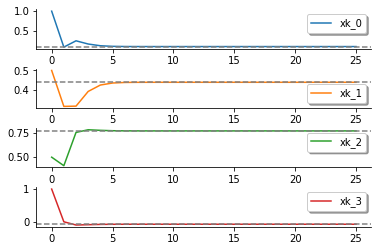

In [7]:
# Funkcijos grafikų braižymui
colors = plt.rcParams["axes.prop_cycle"]()
fig, axs = plt.subplots(a.shape[0], 1)
for i in range(a.shape[0]):
    c = next(colors)["color"]
    axs[i].plot(np.arange(N+1), x_vec[:, i], color=c, label=f"xk_{i}")
    axs[i].axhline(x_real[i], color='gray', linestyle='dashed')
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].legend(shadow=True, fancybox=True)
    
plt.subplots_adjust(hspace=0.5)
plt.show()